# Load the model we had trained previously 

Preliminary description : It is a *Transfer Learning* model based on *VGG16(with pretrained "imagenet" weights*

Validation Accuracy upto now : *0.9680* 

F1_Score on Test Set : *0.9344* , Let's try to increase this accuracy a bit further :)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Gestures_CNN_4.h5' Gestures_CNN_4.h5

# Unzip and Prepare the Dataset

Yes, we are going to train it again

In [2]:
%cd ../
!unzip Gestures_Dataset.zip

In [3]:
import os, shutil

In [4]:
#Let's load and divide the data into train and test sets

base_dir = '/content/Gestures_Dataset_TT/'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

train_cool_dir = os.path.join(train_dir, 'cool')
os.mkdir(train_cool_dir)

validation_cool_dir = os.path.join(validation_dir, 'cool')
os.mkdir(validation_cool_dir)

train_ok_dir = os.path.join(train_dir, 'ok')
os.mkdir(train_ok_dir)

validation_ok_dir = os.path.join(validation_dir, 'ok')
os.mkdir(validation_ok_dir)

train_fist_dir = os.path.join(train_dir, 'fist')
os.mkdir(train_fist_dir)

validation_fist_dir = os.path.join(validation_dir, 'fist')
os.mkdir(validation_fist_dir)

train_stop_dir = os.path.join(train_dir, 'stop')
os.mkdir(train_stop_dir)

validation_stop_dir = os.path.join(validation_dir, 'stop')
os.mkdir(validation_stop_dir)

train_yo_dir = os.path.join(train_dir, 'yo')
os.mkdir(train_yo_dir)

validation_yo_dir = os.path.join(validation_dir, 'yo')
os.mkdir(validation_yo_dir)

In [5]:
original_dataset_dir = '/Gestures_Dataset/'

In [6]:
import random
validation_list = random.sample(range(1, 501), 125)
total_list = list(range(1, 501))
train_list = set(total_list) - set(validation_list)

fnames = ['cool_{}.jpg'.format(i) for i in train_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cool_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cool_{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cool_dir, fname)
  shutil.copyfile(src, dst)



fnames = ['ok_{}.jpg'.format(i) for i in train_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_ok_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['ok_{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_ok_dir, fname)
  shutil.copyfile(src, dst)



fnames = ['fist_{}.jpg'.format(i) for i in train_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_fist_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['fist_{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_fist_dir, fname)
  shutil.copyfile(src, dst)



fnames = ['stop_{}.jpg'.format(i) for i in train_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_stop_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['stop_{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_stop_dir, fname)
  shutil.copyfile(src, dst)



fnames = ['yo_{}.jpg'.format(i) for i in train_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_yo_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['yo_{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_yo_dir, fname)
  shutil.copyfile(src, dst)

In [7]:
print('total training cool images:', len(os.listdir(train_cool_dir)))
print('total validation yo images:', len(os.listdir(validation_yo_dir)))

total training cool images: 375
total validation yo images: 125


# Augment the Data and set up the Training and Validation generators

In [8]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/Gestures_Dataset_TT/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb')

Using TensorFlow backend.


Found 1875 images belonging to 5 classes.
Found 625 images belonging to 5 classes.


# Load the previously trained model

In [9]:
from keras.models import load_model

In [10]:
model = load_model("/content/Gestures_CNN_4.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers[0].name

'vgg16'

In [13]:
for layer in model.layers:
  if layer.name == 'vgg16':
    conv_base = layer

In [15]:
conv_base.name

'vgg16'

In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Unfreeze a few layers of the VGG16 base for fine-tuning

Unfreezing, too many layers increases the chances of overfitting ! So, for now we'll stick with unfreezing a single layer.

In [18]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the Model !

We compile the model, and as a general practice let's decrease the learning rate to 1/10th of the usual :)

In [19]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
                metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


# Train it

In [21]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=120,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=None)

Epoch 1/100
120/120 [==============================] - 60s 503ms/step - loss: 0.4321 - accuracy: 0.8783 - val_loss: 0.0868 - val_accuracy: 0.9616
Epoch 2/100
120/120 [==============================] - 48s 404ms/step - loss: 0.1440 - accuracy: 0.9504 - val_loss: 0.0076 - val_accuracy: 0.9696
Epoch 3/100
120/120 [==============================] - 50s 413ms/step - loss: 0.1321 - accuracy: 0.9580 - val_loss: 0.0366 - val_accuracy: 0.9728
Epoch 4/100
120/120 [==============================] - 49s 407ms/step - loss: 0.1146 - accuracy: 0.9629 - val_loss: 0.0683 - val_accuracy: 0.9712
Epoch 5/100
120/120 [==============================] - 48s 402ms/step - loss: 0.1094 - accuracy: 0.9625 - val_loss: 0.0072 - val_accuracy: 0.9776
Epoch 6/100
120/120 [==============================] - 48s 401ms/step - loss: 0.1086 - accuracy: 0.9639 - val_loss: 0.1515 - val_accuracy: 0.9632
Epoch 7/100
120/120 [==============================] - 48s 400ms/step - loss: 0.0982 - accuracy: 0.9670 - val_loss: 0.5586 -

Nice ! It now has a validation accuracy of *0.9808* a good improvement over *0.9680* ! (But, definitely we can see a bit of overfitting here, let's see what affect it has on our F1_Score over the test set)

# Plot the Accuracy and Loss curves for the model

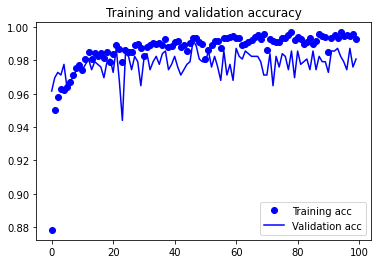

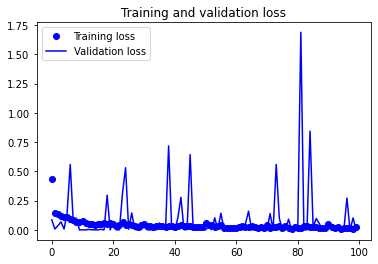

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(100)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
model.save("Gestures_CNN_4_fine_tuned_1.h5")

# Let's test our new fine-tuned model on the Test Set

In [24]:
%cd ../
!unzip Test_bw.zip

In [25]:
from keras.preprocessing.image import ImageDataGenerator

path = "/Test_bw/"
test_datagen = ImageDataGenerator(rescale = 1/255.)

test_generator = test_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle = False)

Found 250 images belonging to 5 classes.


In [26]:
test_generator.class_indices

{'cool': 0, 'fist': 1, 'ok': 2, 'stop': 3, 'yo': 4}

In [27]:
probs = model.predict_generator(generator=test_generator)

In [28]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [29]:
import numpy as np
y_pred = np.argmax(probs, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
mat

array([[50,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0],
       [ 0,  0, 50,  0,  0],
       [ 0,  1,  0, 49,  0],
       [ 0,  0,  0,  0, 50]])

## F1 Score

In [31]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.9959995999599961

Nice ! It gets a pretty high F1 Score this time !

## Let's check which image it missed this time

In [32]:
test_generator.filenames[196] #Thats the one that has gone wrong

'stop/stop_6.jpg'

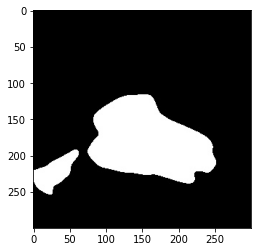

In [33]:
import cv2
img = cv2.imread('Test_bw/stop/stop_6.jpg')
plt.imshow(img)
plt.show()

In [34]:
#Let's see it's prediction for this one. It mistook it to be a fist instead of palm -_-
probs[196]

array([1.0145368e-07, 9.9498582e-01, 7.3112940e-05, 4.9348720e-03,
       6.0559682e-06], dtype=float32)